In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
#数据读取
data_01=pd.read_csv(r'H:\阿里云\2012美国总统竞选赞助数据分析\data_01.csv')
data_02=pd.read_csv(r'H:\阿里云\2012美国总统竞选赞助数据分析\data_02.csv')
data_03=pd.read_csv(r'H:\阿里云\2012美国总统竞选赞助数据分析\data_03.csv')
data_01.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11


In [78]:
data_02.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Obama, Barack","THOMAS, MAMIE ETHEL",NY,RETIRED,RETIRED,200.0,30-SEP-11
1,"Obama, Barack","PIZZI, JULIA",NY,DEWEY & LEBOEUF,ATTORNEY,100.0,14-SEP-11
2,"Obama, Barack","LEHRER, RANDY",NY,SELF-EMPLOYED,PSYCHOTHERAPIST,10.0,04-JUL-11
3,"Obama, Barack","MARKS, ELIZABETH",NY,MATTHEW MARKS GALLERY,DIRECTOR ART GALLERY,150.0,30-SEP-11
4,"Obama, Barack","GELB, DANIEL",NY,SOUTH BEACH PSYCHIATRIC CENTER,SOCIAL WORKER,150.0,04-AUG-11


In [79]:
data_03.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Perry, Rick","NORRIS, BOBBY",TX,SELF,REALTOR/ RANCHER,1000.0,14-DEC-11
1,"Perry, Rick","HUNT, CAROLINE",TX,HOMEMAKER,HOMEMAKER,2500.0,14-DEC-11
2,"Perry, Rick","ROBINOWITZ, DALE",TX,SELF-EMPLOYED,DENTIST,2500.0,14-DEC-11
3,"Perry, Rick","ZUNIGA, DAVID & SYLVIA",TX,DAVID M. ZUNIGA PE,OWNER,250.0,14-DEC-11
4,"Perry, Rick","FOSTER, GLENNA",TX,SELF,INVESTOR/ CONSULTANT,1500.0,14-DEC-11


In [80]:
#进行数据拼接
data=pd.concat([data_01,data_02,data_03])
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11


In [81]:
#查看数据的信息，包括每个字段的名称、非空数量、字段的数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001732 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001732 non-null object
contbr_nm            1001732 non-null object
contbr_st            1001728 non-null object
contbr_employer      988003 non-null object
contbr_occupation    993302 non-null object
contb_receipt_amt    1001732 non-null float64
contb_receipt_dt     1001732 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [10]:
#用统计学指标描述数据的概要
data.describe()

,contb_receipt_amt
count,1.001732e+06
mean,2.982358e+02
std,3.749665e+03
min,-3.080000e+04
25%,3.500000e+01
50%,1.000000e+02
75%,2.500000e+02
max,2.014491e+06


In [82]:
#缺失值处理
#从data.info()中，我们可以看到contbr_employer，contbr_occupation均有少量的缺失值，我们用not provided填充
data['contbr_employer'].fillna('not provided',inplace=True)
data['contbr_occupation'].fillna('not provided',inplace=True)

In [83]:
data[data['contbr_employer'].isnull()]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt


In [15]:
data[data['contbr_occupation'].isnull()]

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001732 entries, 0 to 1730
Data columns (total 7 columns):
cand_nm              1001732 non-null object
contbr_nm            1001732 non-null object
contbr_st            1001728 non-null object
contbr_employer      1001732 non-null object
contbr_occupation    1001732 non-null object
contb_receipt_amt    1001732 non-null float64
contb_receipt_dt     1001732 non-null object
dtypes: float64(1), object(6)
memory usage: 61.1+ MB


In [85]:
#查看数据中总统候选人都有谁
print('共有{}位候选人，分别是'.format(len(data['cand_nm'].unique())))
data['cand_nm'].unique()

共有13位候选人，分别是


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [22]:
#通过搜索引擎等途径，获取到每个总统候选人的所属党派，建立字典parties，候选人名字作为键，所属党派作为对应的值
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [23]:
#通过map映射函数，增加一列party存储党派信息
data['party']=data['cand_nm'].map(parties)#其中map的映射情况
#查看两个党派的情况
data['party'].value_counts()
#可以看出Republican（共和党）接受的赞助总金额更高，Democrat（民主党）获得的赞助次数更多一些

Democrat      593747
Republican    407985
Name: party, dtype: int64

In [24]:
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11,Republican


# 个字段名称含义

cand_nm – 接受捐赠的候选人姓名
contbr_nm – 捐赠人姓名
contbr_st – 捐赠人所在州
contbr_employer – 捐赠人所在公司
contbr_occupation – 捐赠人职业
contb_receipt_amt – 捐赠数额（美元）
contb_receipt_dt – 收到捐款的日期

In [28]:
#按照职业汇总对赞助总金额进行排序
#按照职位进行汇总，计算赞助总金额，展示前20项，发现不少职业是相同的，只不过是表达的不一样而已，比如C.E.O与CEO都是一个职业
data.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(ascending=False)[:20]

contbr_occupation
RETIRED                                   48176397.00
ATTORNEY                                  18470473.30
HOMEMAKER                                 17484807.65
INFORMATION REQUESTED PER BEST EFFORTS    15859514.55
INFORMATION REQUESTED                      8742357.59
PHYSICIAN                                  7224044.40
PRESIDENT                                  6347843.59
EXECUTIVE                                  5273717.90
CONSULTANT                                 4932627.98
not provided                               4224760.39
CEO                                        3570942.20
LAWYER                                     3537982.19
OWNER                                      3278488.16
INVESTOR                                   3204481.92
ENGINEER                                   2730527.43
PROFESSOR                                  2458033.81
C.E.O.                                     2433218.11
SELF-EMPLOYED                              2259150.94
MANAGER   

In [31]:
#利用函数进行数据转换，职业与雇主信息分析
#这里有许多类似C.E.O和CEO这样的数据，下面我们用dict.get方法来处理一下这样的数据
occupation_map = {
  'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
  'INFORMATION REQUESTED':'NOT PROVIDED',
  'SELF' : 'SELF-EMPLOYED',
  'SELF EMPLOYED' : 'SELF-EMPLOYED',
  'C.E.O.':'CEO',
  'LAWYER':'ATTORNEY',
}

# 如果不在字典中,返回x
f = lambda x: occupation_map.get(x, x)
data.contbr_occupation = data.contbr_occupation.map(f)
#data.contbr_occupation相当于上面语句中的x
#data.contbr_occupation返回的结果与occupation_map中的键进行映射，如果相同返回对应的值，如果不同返回默认值
#contbr_occupation – 捐赠人职业
data.contbr_occupation.head()

0         RETIRED
1         RETIRED
2    NOT PROVIDED
3         RETIRED
4         RETIRED
Name: contbr_occupation, dtype: object

In [35]:
dict_data ={1:'one',2:'two',3:'three',4:'four'}
print(dict_data.get(1))
print(dict_data.get(3))
print(dict_data.get(5))
print(dict_data.get(5,'notfound'))

one
three
None
notfound


In [32]:
data.head()
#contbr_occupation – 捐赠人职业

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11,Republican
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11,Republican
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,NOT PROVIDED,250.0,5-Jul-11,Republican
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11,Republican
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11,Republican


In [38]:
#同样地，对雇主信息进行类似转换
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}
f = lambda x: emp_mapping.get(x, x)
data.contbr_employer = data.contbr_employer.map(f)

In [ ]:
数据筛选
从下面可以看出，赞助基本集中在Obama、Romney之间，为了更好的聚焦在两者间的竞争，我们选取这两位候选人的数据子集作进一步分析

In [39]:
#查看各候选人获得的赞助总金额
#contb_receipt_amt – 捐赠数额（美元）
# cand_nm – 接受捐赠的候选人姓名
data.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False)

cand_nm
Obama, Barack                     1.335028e+08
Romney, Mitt                      8.521925e+07
Paul, Ron                         2.072257e+07
Perry, Rick                       1.841251e+07
Gingrich, Newt                    1.201183e+07
Santorum, Rick                    1.072809e+07
Cain, Herman                      7.047265e+06
Pawlenty, Timothy                 4.255054e+06
Huntsman, Jon                     3.204350e+06
Bachmann, Michelle                2.677185e+06
Johnson, Gary Earl                5.669616e+05
Roemer, Charles E. 'Buddy' III    3.674575e+05
McCotter, Thaddeus G              3.703000e+04
Name: contb_receipt_amt, dtype: float64

In [40]:
len(data.groupby('cand_nm'))#正确一共是13个候选人

13

In [47]:
#选取候选人为Obama、Romney的子集数据
data_vs = data[data['cand_nm'].isin(['Obama, Barack','Romney, Mitt'])].copy()
#data['cand_nm'].isin(['Obama, Barack','Romney, Mitt']）返回的是一个bool类型的值
# data[bool]返回的是具体的数据，所有为true的数据
#data.copy()把返回的数据进行复制
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
410,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,1-Feb-12,Republican
411,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,1-Feb-12,Republican
412,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-Apr-12,Republican
413,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-Aug-11,Republican
414,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,7-Mar-12,Republican


In [50]:
#离散化数据，用cut进行数据离散化
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(data_vs['contb_receipt_amt'],bins)
labels.head()

410      (10, 100]
411    (100, 1000]
412    (100, 1000]
413      (10, 100]
414      (10, 100]
Name: contb_receipt_amt, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [59]:
#按照党派、职业对赞助金额进行汇总，类似excel中的透视表操作，聚合函数为sum
by_occupation = data.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
#过滤掉赞助金额小于200W的数据

over_2mm = by_occupation[by_occupation.sum(1)>2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,14286324.84,7.722131e+06
CEO,2071474.79,3.932686e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06
HOMEMAKER,4243394.30,1.324141e+07
INVESTOR,884133.00,2.320349e+06
MANAGER,762693.22,1.404878e+06
NOT PROVIDED,4849801.96,1.975207e+07


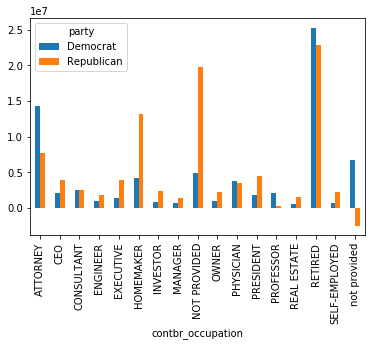

In [52]:
over_2mm.plot(kind='bar')

In [ ]:
根据职业与雇主信息分组运算
我们接下来了解一下对Obama和Romney总出资最高的职业和雇主。注意，这里巧妙地利用了dict.get，它允许没有映射关系的职业也能“通过”

In [60]:

def get_top_amounts(group,key,n=5):
#传入groupby分组后的对象，返回按照key字段汇总的排序前n的数据
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]
  
grouped = data_vs.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25270707.23
               ATTORNEY             14286324.84
               not provided          6677431.22
               NOT PROVIDED          4849801.96
               HOMEMAKER             4243394.30
               PHYSICIAN             3732387.44
               CONSULTANT            2459812.71
Romney, Mitt   RETIRED              11266949.23
               NOT PROVIDED         11173374.84
               HOMEMAKER             8037250.86
               ATTORNEY              5310284.02
               PRESIDENT             2403439.77
               CEO                   2247242.03
               EXECUTIVE             2230653.79
Name: contb_receipt_amt, dtype: float64

In [61]:
#同样的，使用get_top_amounts()对雇主进行分析处理
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22666102.20
               SELF-EMPLOYED         18584277.16
               NOT EMPLOYED           8584118.70
               not provided           6649231.52
               NOT PROVIDED           5036178.37
               HOMEMAKER              2599987.04
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
Romney, Mitt   NOT PROVIDED          11827237.12
               RETIRED               11264701.35
               HOMEMAKER              8037000.86
               SELF-EMPLOYED          7265136.53
               STUDENT                 488642.82
               CREDIT SUISSE           265650.00
               MORGAN STANLEY          262266.00
               GOLDMAN SACH & CO.      233250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

In [62]:
#labels是之前赞助金额离散化后的Series
grouped_bins = data_vs.groupby(['cand_nm',labels])
grouped_bins.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153992.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [67]:
# 接下来，我们再统计各区间的赞助金额
bucket_sums=grouped_bins['contb_receipt_amt'].sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798731.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [74]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
data11=DataFrame(np.arange(6).reshape((2,3)),index=pd.Index(['street1','street2']),columns=pd.Index(['one','two','three']))
print(data11)
print('-----------------------------------------\n')
data2=data11.stack()
data3=data2.unstack()
print(data2)
print('-----------------------------------------\n')
print(data3)

         one  two  three
street1    0    1      2
street2    3    4      5
-----------------------------------------

street1  one      0
         two      1
         three    2
street2  one      3
         two      4
         three    5
dtype: int32
-----------------------------------------

         one  two  three
street1    0    1      2
street2    3    4      5


In [ ]:
# 使用stack函数，将data的行索引['one','two','three’]转变成列索引（第二层），便得到了
# 一个层次化的Series（data2），使用unstack函数，将data2的第二层列索引转变成行索引（默认的，可以
# 改变），便又得到了DataFrame（data3

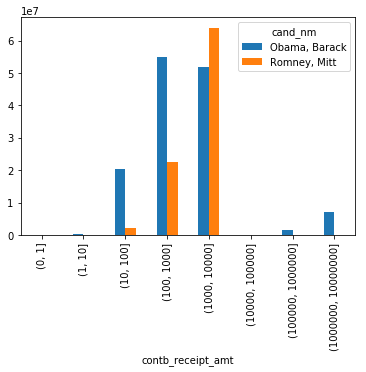

In [69]:
#Obama、Romney各区间赞助总金额
bucket_sums.plot(kind='bar')

In [70]:
#算出每个区间两位候选人收到赞助总金额的占比
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710177,0.289823
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


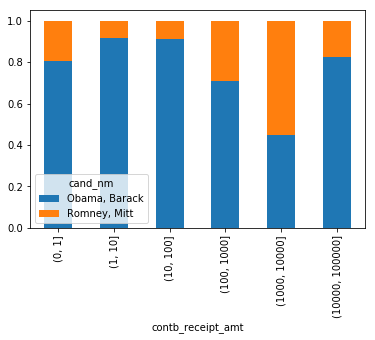

In [71]:
#使用柱状图，指定stacked=True进行堆叠，即可完成百分比堆积图
normed_sums[:-2].plot(kind='bar',stacked=True)

In [87]:
data.groupby('contbr_nm')['contbr_nm'].count().sort_values(ascending=False)[:20]

contbr_nm
SEBAG, DAVID             267
WILLIAMS, DEBBY          205
BERKE, DAVID MICHAEL     171
CASPERSON, CAROLINA      167
FALLSGRAFF, TOBY         152
SMITH, ERIK              145
SKINNER, DONNA           136
HARRIS, CLAUDIA W.       134
POTTS, LILLIE            115
ROSBERG, MARILYN         115
DFHDFH, DFHDFH           113
DUDLEY, DEBBIE           111
HAUGHEY, NOEL ANTHONY    107
RUSH, KYLE                96
SMITH, CHARLES            95
SHERWIN, GLEN R.          94
MITCHELL, CAITLIN         90
KARIMIAN, AFSANEH         88
NURU, ISAAC               87
BIRMINGHAM, TOM           85
Name: contbr_nm, dtype: int64

In [86]:
data.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-Jun-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-Jun-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,5-Jul-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,1-Aug-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-Jun-11


In [89]:
data_vs['time'] = pd.to_datetime(data_vs['contb_receipt_dt'])
data_vs['time']

410      2012-02-01
411      2012-02-01
412      2012-04-13
413      2011-08-21
414      2012-03-07
415      2012-03-17
416      2012-03-20
417      2012-04-09
418      2012-01-28
419      2012-02-01
420      2011-11-29
421      2011-12-29
422      2011-11-22
423      2011-12-31
424      2011-04-28
425      2011-06-27
426      2011-06-20
427      2012-02-14
428      2012-04-27
429      2012-04-09
430      2012-04-23
431      2012-04-12
432      2012-04-30
433      2012-04-23
434      2012-04-24
435      2012-04-20
436      2012-04-24
437      2012-04-21
438      2012-04-09
439      2012-04-16
            ...    
201356   2012-03-31
201357   2012-03-28
201358   2012-03-17
201359   2012-03-31
201360   2012-03-02
201361   2012-03-07
201362   2012-04-25
201363   2012-04-23
201364   2012-04-20
201365   2012-04-30
201366   2012-04-26
201367   2012-04-19
201368   2012-04-05
201369   2012-04-26
201370   2012-04-19
201371   2011-09-04
201372   2012-03-26
201373   2011-10-26
201374   2011-12-31


In [90]:
data_vs.set_index('time',inplace=True)
data_vs.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,party
time,,,,,,,,
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,1-Feb-12,Republican
2012-02-01,"Romney, Mitt","ELDERBAUM, WILLIAM",AA,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,1-Feb-12,Republican
2012-04-13,"Romney, Mitt","CARLSEN, RICHARD",AE,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-Apr-12,Republican
2011-08-21,"Romney, Mitt","DELUCA, PIERRE",AE,CISCO,ENGINEER,30.0,21-Aug-11,Republican
2012-03-07,"Romney, Mitt","SARGENT, MICHAEL",AE,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,7-Mar-12,Republican


In [91]:
vs_time = data_vs.groupby('cand_nm').resample('M')['cand_nm'].count()
vs_time.unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
time,,
2011-04-30,13861,1099
2011-05-31,12255,4207
2011-06-30,26181,5822
2011-07-31,12571,2545
2011-08-31,19995,3296
2011-09-30,47141,8034
2011-10-31,26175,5437
2011-11-30,32809,7879
2011-12-31,63984,10466


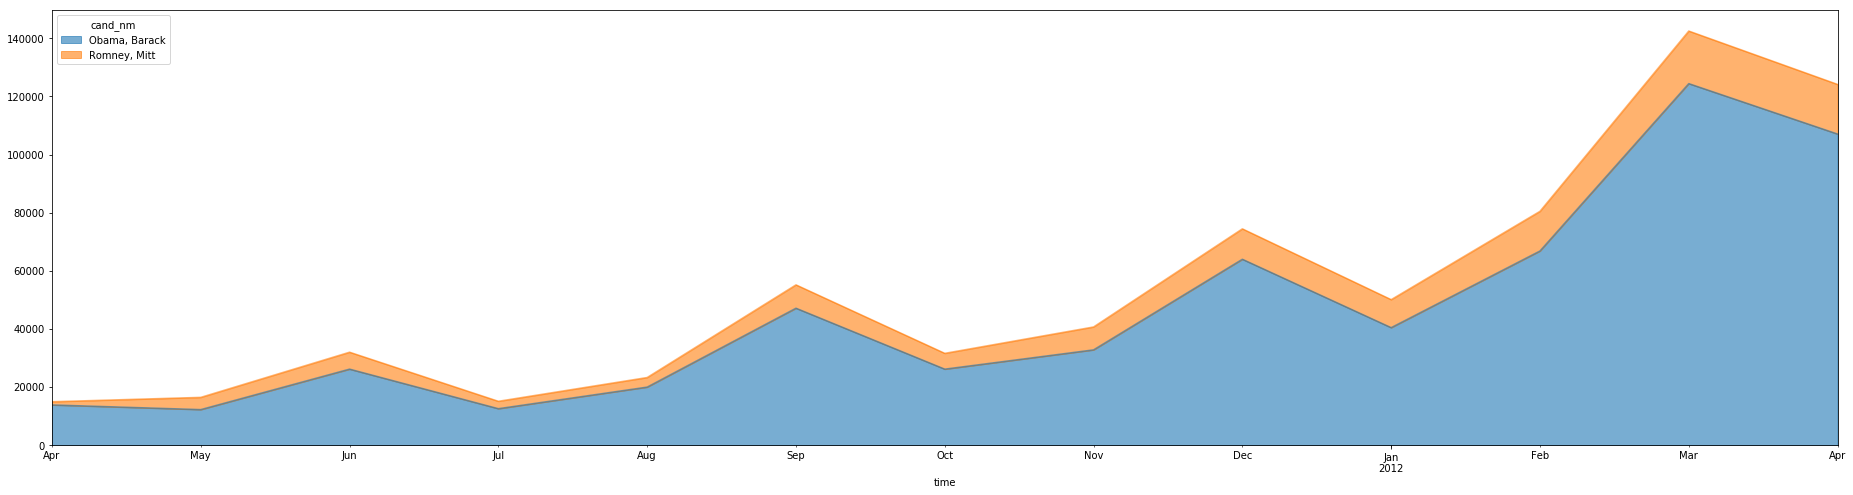

In [92]:
fig1, ax1=plt.subplots(figsize=(32,8))
vs_time.unstack(0).plot(kind='area',ax=ax1,alpha=0.6)
plt.show()